In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [2]:
# Generate random data with three clusters
n_samples = 777
n_features = 2
n_clusters = 3

data, labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

In [8]:
data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [3]:
# Initialize K-Means with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the K-Means model to the data
kmeans.fit(data)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
cluster_assignments

array([2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1,
       0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2,
       0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2,
       1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2,
       1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
       1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1,

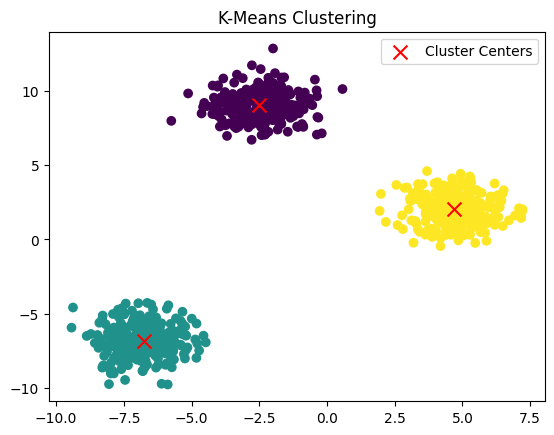

In [5]:
# Plot the data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Now, let's demonstrate the elbow method to determine the optimal number of clusters:

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

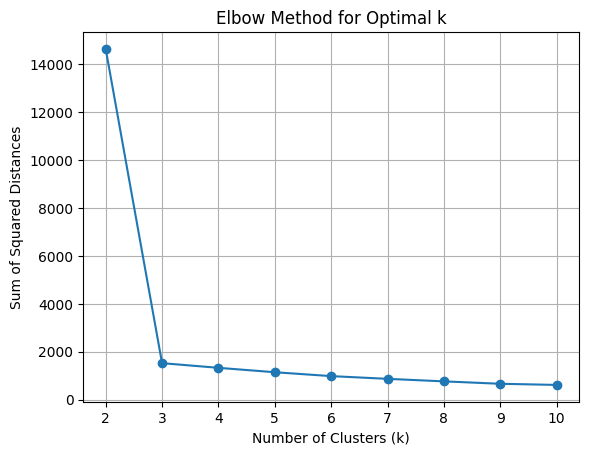

In [6]:
# Calculate the sum of squared distances for different values of k
sse = []
silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    cluster_assignments = kmeans.labels_
    silhouette_avg = silhouette_score(data, cluster_assignments)
    silhouette_scores[str(k)] = silhouette_avg


# Plot the elbow curve
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

{'2': 0.7036556926520544,
 '3': 0.842751729788642,
 '4': 0.6592476276446282,
 '5': 0.4920491717475207,
 '6': 0.3259261932767586,
 '7': 0.33827975628450757,
 '8': 0.3437560176262032,
 '9': 0.34315753694178847,
 '10': 0.3387318009984044}